In [1]:
# First install Kaggle and opendatasets to download from Kaggle since file too big
!pip install kaggle
!pip install opendatasets
import opendatasets as od
import pandas as pd
from datetime import datetime

# You will need Kaggle username and key, use mine:
# ppabloo
# 
od.download("https://www.kaggle.com/datasets/kazanova/sentiment140/")

#Read the dataset
df = pd.read_csv('./sentiment140/training.1600000.processed.noemoticon.csv', 
                 names=['score', 'id', 'date', 'col4', 'author', 'tweet'])

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ppabloo
Your Kaggle Key: ········


100%|██████████| 80.9M/80.9M [00:07<00:00, 11.2MB/s]


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 232719-232720: invalid continuation byte

In [7]:
print(df.head(10))

   score          id                          date      col4           author  \
0      0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1      0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2      0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3      0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4      0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
5      0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
6      0  1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY          mybirch   
7      0  1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY             coZZ   
8      0  1467811795  Mon Apr 06 22:20:05 PDT 2009  NO_QUERY  2Hood4Hollywood   
9      0  1467812025  Mon Apr 06 22:20:09 PDT 2009  NO_QUERY          mimismo   

                                               tweet  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t... 

In [11]:
column_names = df.columns

# Print the column names
print(column_names)

Index(['score', 'id', 'date', 'col4', 'author', 'tweet', 'cleaned_tweet'], dtype='object')


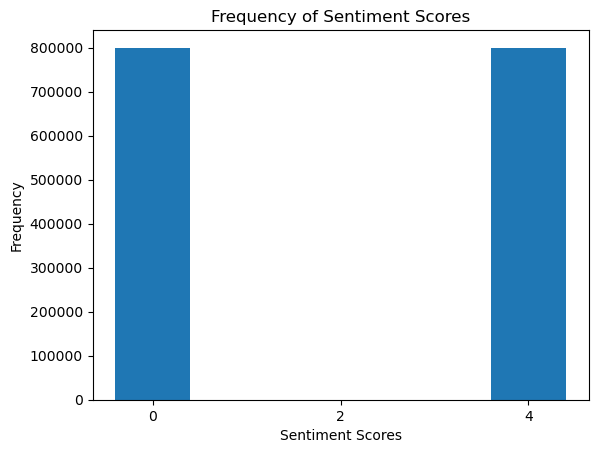

In [12]:
import matplotlib.pyplot as plt
filtered_df = df[df['score'].isin([0, 2, 4])]

# Count the frequency of each value
value_counts = filtered_df['score'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Set labels and title
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.title('Frequency of Sentiment Scores')
plt.xticks([0, 2, 4])

# Show the plot
plt.show()

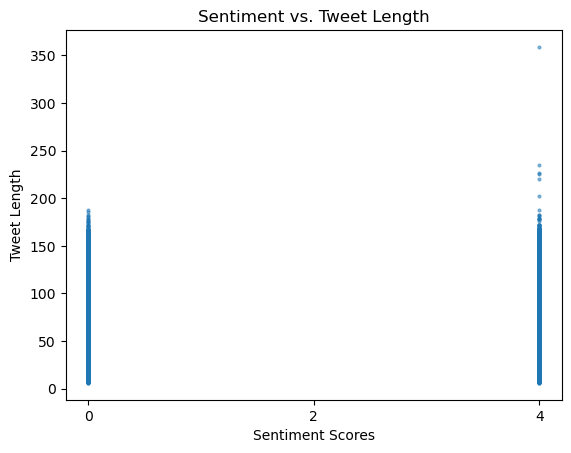

In [13]:
filtered_df = df[df['score'].isin([0, 2, 4])]

# Calculate the length of each tweet and add it as a new column
filtered_df['tweet_length'] = filtered_df['tweet'].apply(len)

# Create a scatter plot
plt.scatter(filtered_df['score'], filtered_df['tweet_length'], alpha=0.5, s=4)

# Set labels and title
plt.xlabel('Sentiment Scores')
plt.ylabel('Tweet Length')
plt.title('Sentiment vs. Tweet Length')
plt.xticks([0, 2, 4])

# Show the plot
plt.show()

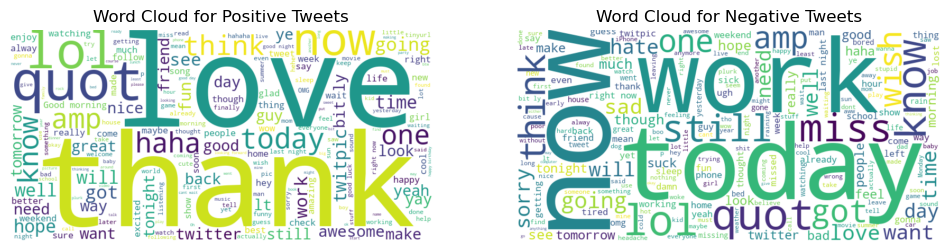

In [14]:
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud

# Assuming df is the DataFrame containing the sentiment140 dataset

# Preprocess the text data
df['cleaned_tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

# Create separate DataFrames for positive and negative tweets
positive_tweets = df[df['score'] == 4]
negative_tweets = df[df['score'] == 0]

# Generate Word Cloud for Positive Tweets
positive_text = ' '.join(positive_tweets['cleaned_tweet'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate Word Cloud for Negative Tweets
negative_text = ' '.join(negative_tweets['cleaned_tweet'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X = df['tweet']
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.780946875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79    159494
           4       0.81      0.74      0.77    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

